In [4]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as SklearnKMeans


In [5]:

np.random.seed(42)

# Generate synthetic dataset with 3 centers (clusters)
X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)


In [6]:
# Function to calculate Euclidean Distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


In [7]:
# KMeans Class with Enhanced Features
class KMeans:
    def __init__(self, K=3, max_iters=100, plot_steps=False):
        self.K = K  # Number of clusters
        self.max_iters = max_iters  # Maximum number of iterations
        self.plot_steps = plot_steps  # Flag to plot intermediate steps

        self.clusters = [[] for _ in range(self.K)]  # List of sample indices for each cluster
        self.centroids = []  # List of centroids
        self.centroid_history = []  # To track centroids at each iteration

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # Initialize centroids randomly
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        self.centroid_history.append(self.centroids.copy())  # Store initial centroids

        # Optimization loop (KMeans clustering)
        for i in range(self.max_iters):
            # Update clusters
            self.clusters = self._create_clusters(self.centroids)

            # Plotting intermediate steps
            if self.plot_steps:
                self.plot(i)

            # Store the old centroids
            centroids_old = self.centroids

            # Update centroids based on the new clusters
            self.centroids = self._get_centroids(self.clusters)
            self.centroid_history.append(self.centroids.copy())  # Store centroids after each update

            # Check for convergence (if centroids stop moving)
            if self._is_converged(centroids_old, self.centroids):
                print(f"Converged at iteration {i+1}")
                break

            # Plotting intermediate steps
            if self.plot_steps:
                self.plot(i)

        # Return cluster labels
        return self._get_cluster_labels(self.clusters)

    # Get cluster labels for each sample
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels

    # Create clusters by assigning each sample to the nearest centroid
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    # Find the closest centroid to a sample
    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    # Calculate new centroids as the mean of the assigned points
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    # Check if centroids have converged (no change)
    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    # Plot function to visualize the progress of clustering
    def plot(self, iteration=None):
        fig, ax = plt.subplots(figsize=(10, 7))

        # Plot all points
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point, label=f'Cluster {i+1}')

        # Plot centroids
        for point in self.centroids:
            ax.scatter(*point, marker='x', color='black', linewidth=2, s=200)

        # Title and Labels
        ax.set_title(f"KMeans Clustering {'- Iteration ' + str(iteration + 1) if iteration is not None else ''}")
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.legend(loc='best')
        plt.show()

    # Visualizing centroid evolution
    def plot_centroid_evolution(self):
        fig, ax = plt.subplots(figsize=(10, 7))

        # Plot each centroid's evolution across iterations
        for i in range(len(self.centroid_history)):
            centroids_iter = np.array(self.centroid_history[i])
            ax.scatter(centroids_iter[:, 0], centroids_iter[:, 1], color='black', marker='x', label=f"Iteration {i + 1}")
        
        ax.set_title("Centroid Evolution")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        plt.legend()
        plt.show()


In [8]:
# Elbow Method (Inertia vs. K)
def elbow_method(X, max_k=10):
    inertia = []
    k_range = range(1, max_k + 1)

    for k in k_range:
        kmeans = SklearnKMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(10, 7))
    plt.plot(k_range, inertia, marker='o')
    plt.title("Elbow Method: Inertia vs. Number of Clusters")
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Inertia (Sum of Squared Distances)")
    plt.show()

In [9]:
# Silhouette Scores for Different K Values
def silhouette_scores(X, max_k=10):
    silhouette_avg = []
    k_range = range(2, max_k + 1)  # Start from 2 because silhouette score is not defined for 1 cluster

    for k in k_range:
        kmeans = SklearnKMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        silhouette_avg.append(silhouette_score(X, labels))

    plt.figure(figsize=(10, 7))
    plt.plot(k_range, silhouette_avg, marker='o')
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Silhouette Score")
    plt.show()

In [10]:
# Cluster Distribution Visualization
def cluster_distribution(X, y_pred):
    plt.figure(figsize=(10, 7))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.5)
    plt.title("Cluster Distribution (Predicted Clusters)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

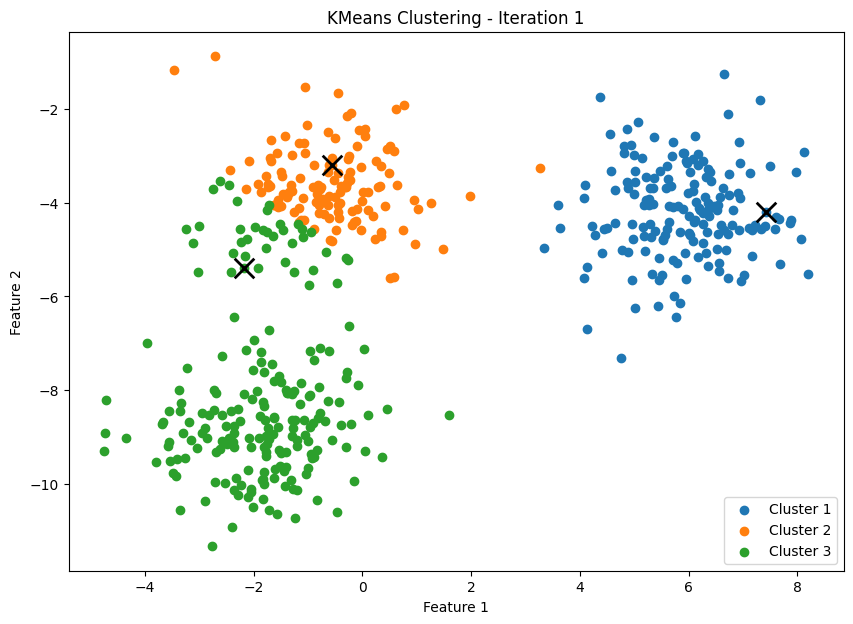

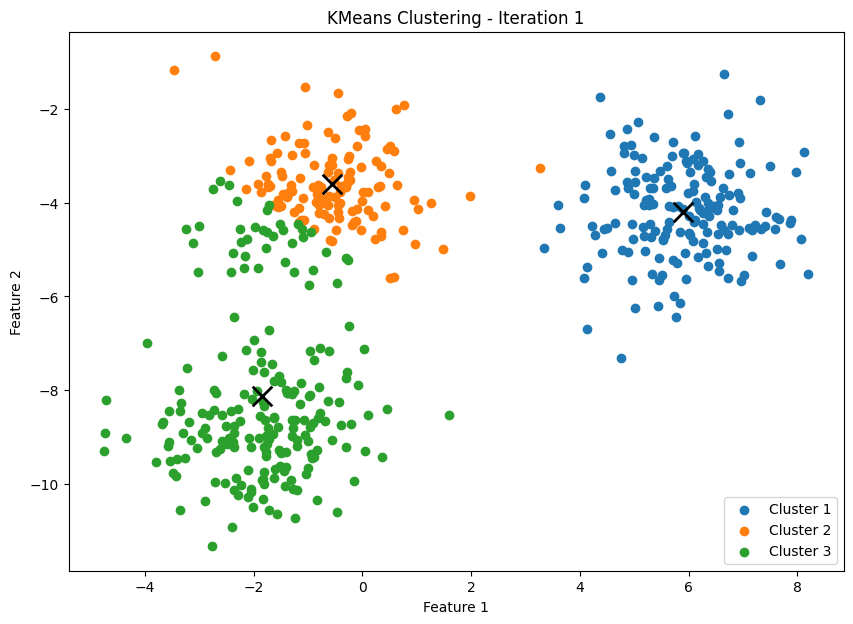

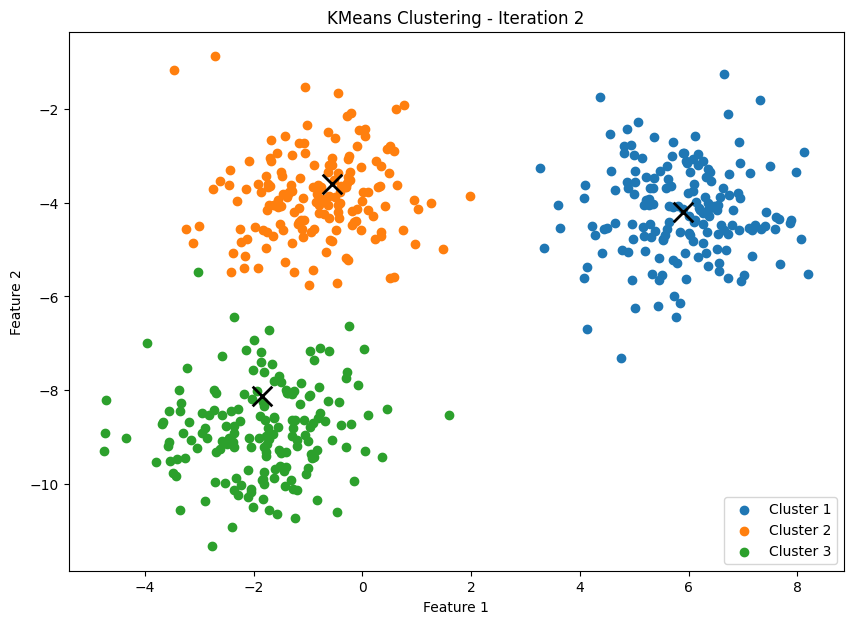

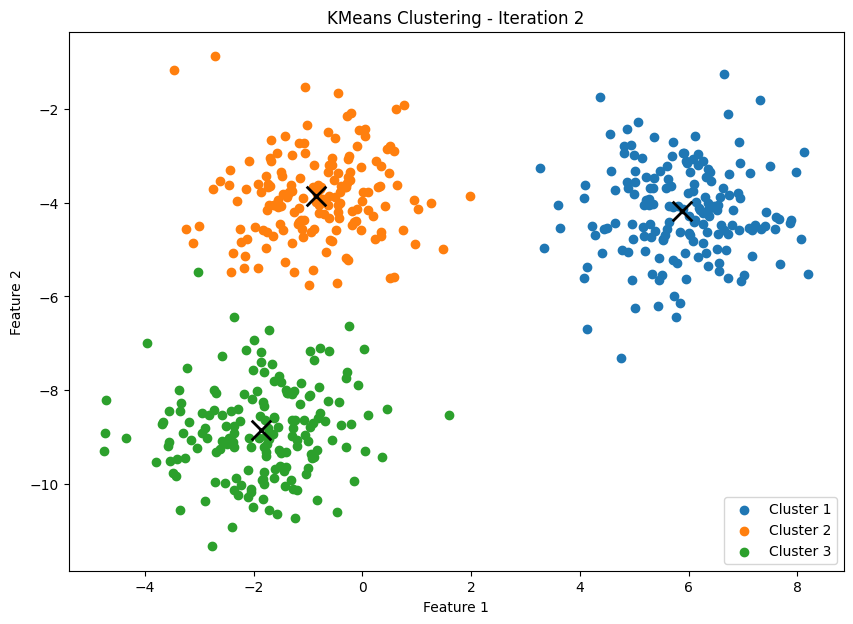

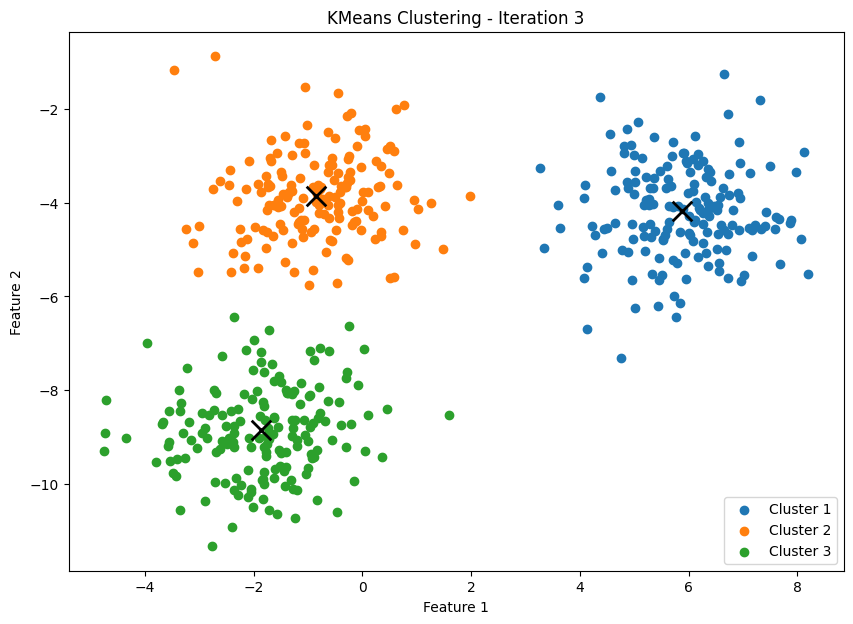

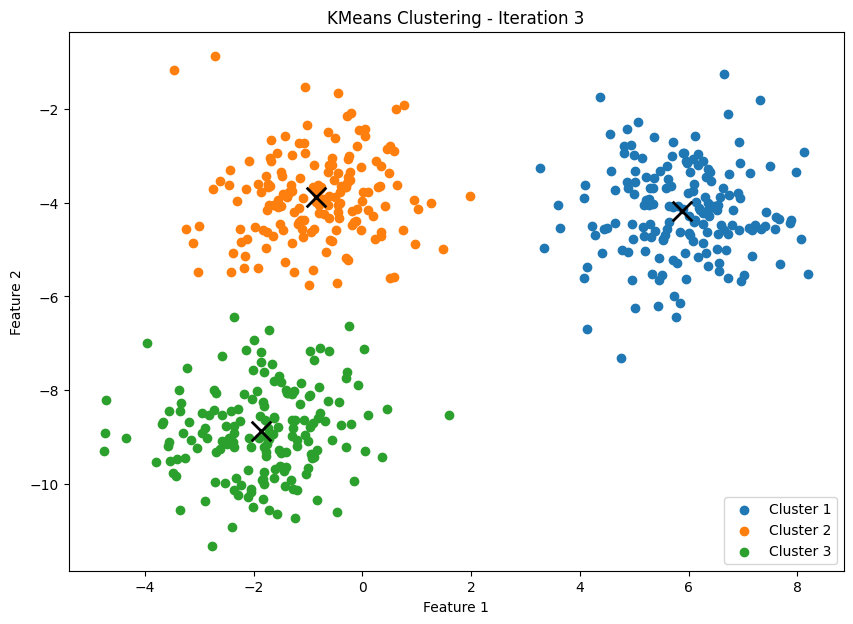

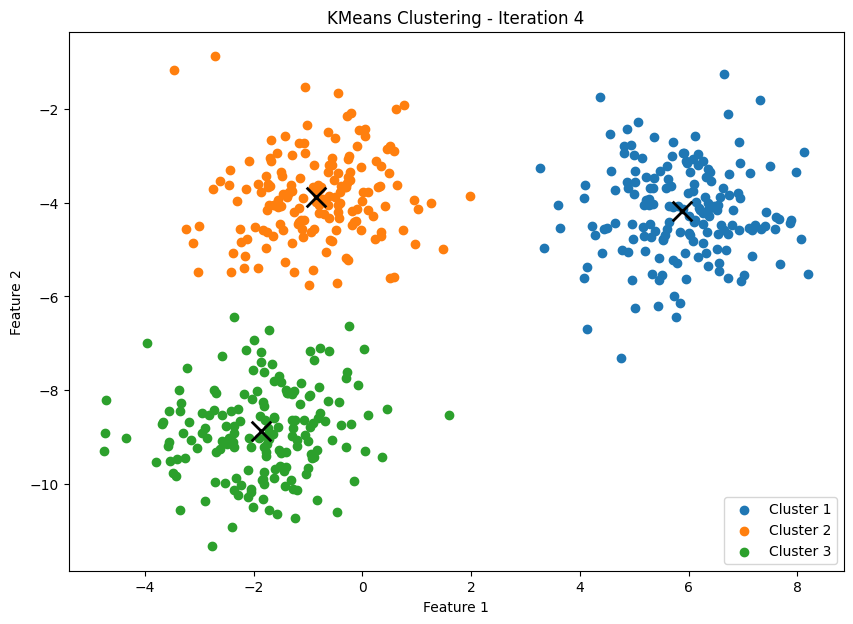

Converged at iteration 4
Silhouette Score: 0.6837


In [18]:
# Run KMeans with custom K (3 clusters for this case)
km = KMeans(K=3, max_iters=150, plot_steps=True)
y_pred = km.predict(X)

# Evaluate and compare clustering performance
silhouette_avg = silhouette_score(X, y_pred)
print(f"Silhouette Score: {silhouette_avg:.4f}")


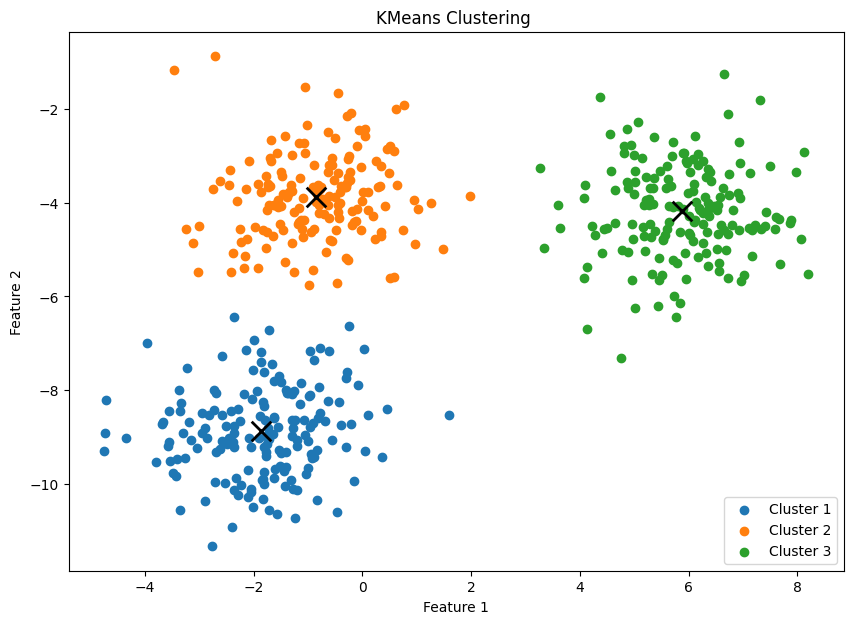

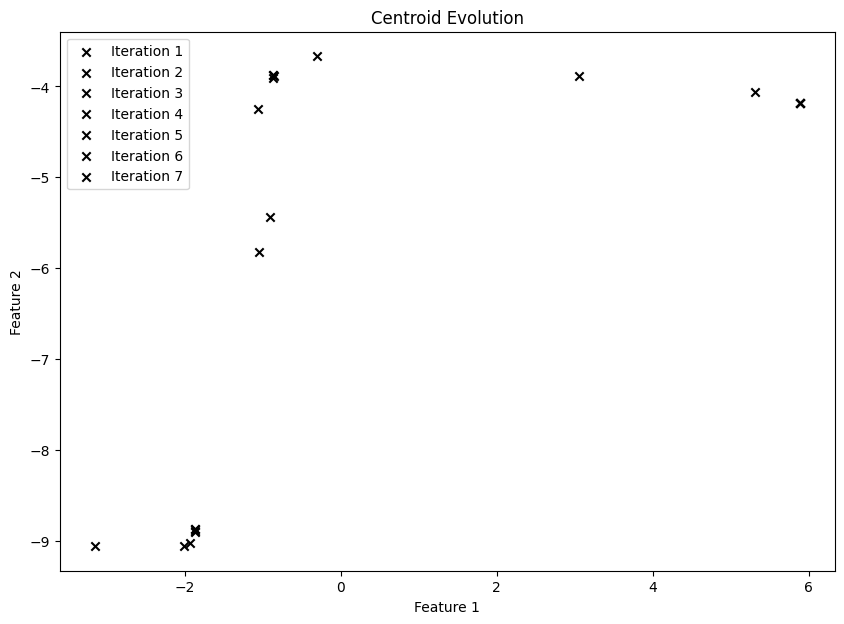

In [12]:
# Visualizing the results
km.plot()
km.plot_centroid_evolution()


/home/varun/miniconda3/envs/scratch_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/varun/miniconda3/envs/scratch_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/varun/miniconda3/envs/scratch_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/varun/miniconda3/envs/scratch_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416:

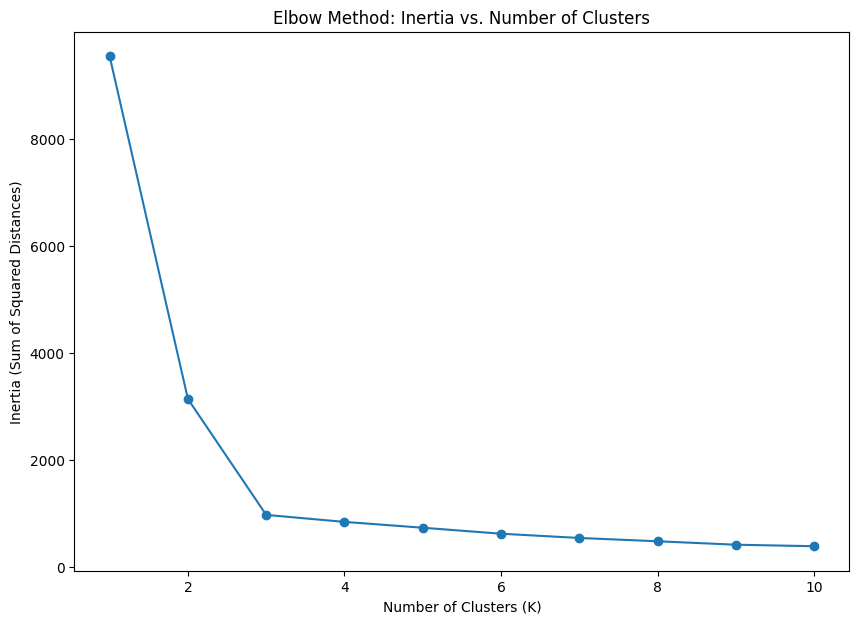

In [14]:
# Elbow Method
elbow_method(X, max_k=10)

/home/varun/miniconda3/envs/scratch_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/varun/miniconda3/envs/scratch_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/varun/miniconda3/envs/scratch_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/varun/miniconda3/envs/scratch_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416:

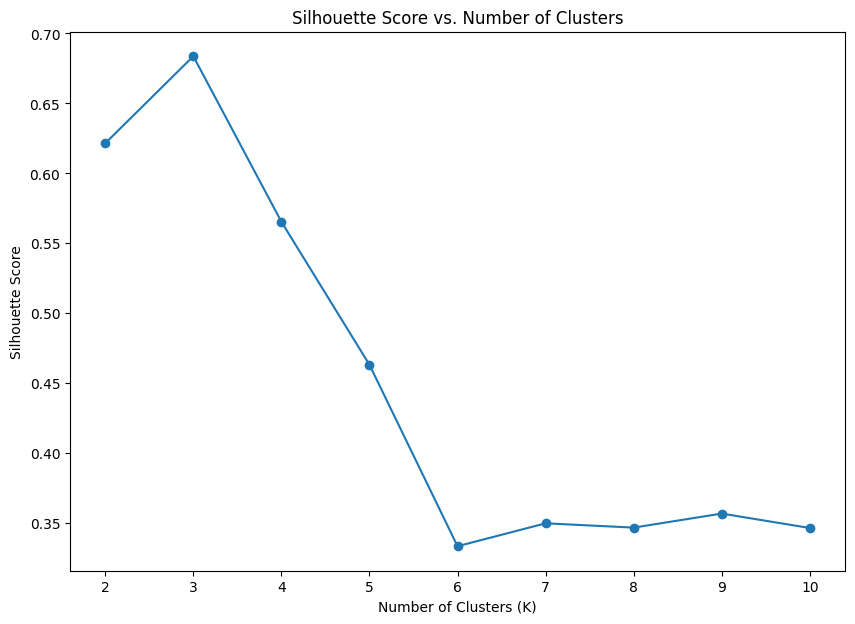

In [15]:
# Silhouette Scores for Different K Values
silhouette_scores(X, max_k=10)



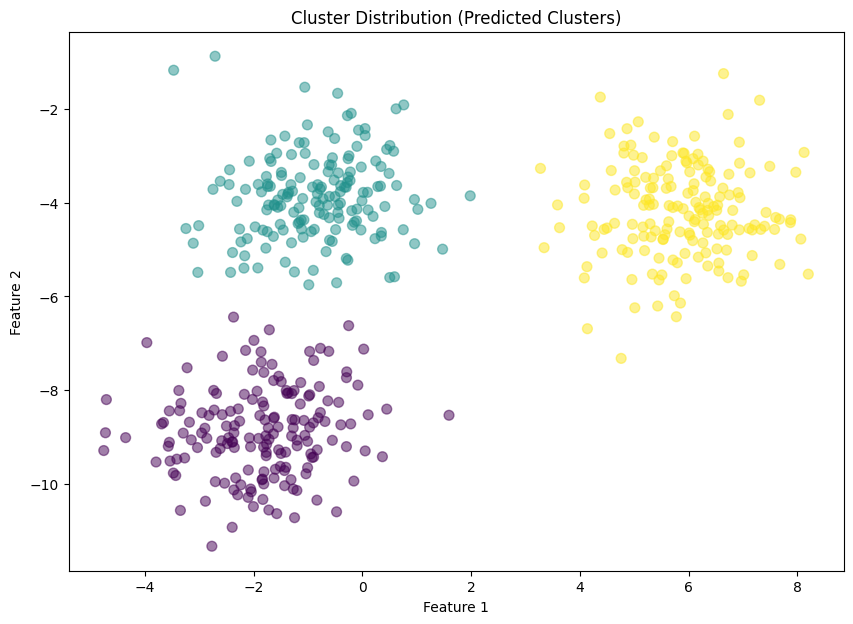

In [16]:
# Cluster Distribution
cluster_distribution(X, y_pred)


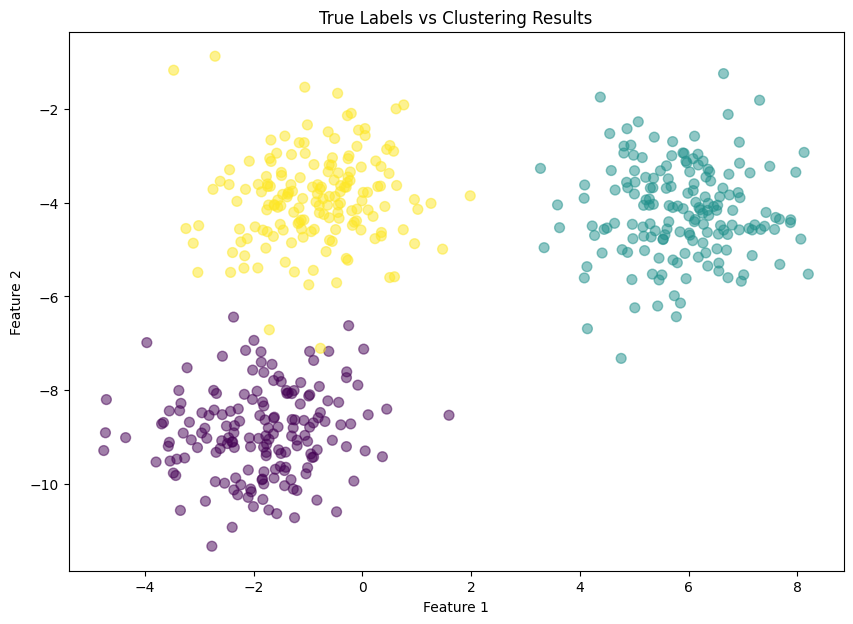

In [17]:

# Optional: Visualize comparison to ground truth labels
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.5)
plt.title("True Labels vs Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
